# **Movie Revenue** <br> **Data mining + Machine learning project** <br>  i will add more desc here 

---

#  الملخص التنفيذي



يهدف هذا المشروع إلى تطوير نظام تنقيب عن البيانات مدعوم بتقنيات التعلم الآلي للتنبؤ بإيرادات الأفلام المستقبلية واقتراح طاقم التمثيل الأمثل بناءً على خصائص الفيلم المختلفة.
<br>
 تم تجميع مجموعة بيانات شاملة تحتوي على معلومات متقدمة حول الأفلام مثل: النوع، اللغة، ميزانية الإنتاج، الشركات المنتجة، تقييمات الأفلام على  معلومات الممثلين وتقييماتهم، إضافة إلى متغيرات مشتقة مثل الربح وصافي الإيراد، وعدد الممثلين الفريدين، ومتوسط تقييماتهم، وغير ذلك.  
 <br>
الهدف الأساسي هو بناء نماذج تنبؤية دقيقة تساعد صناع القرار في صناعة السينما على تقدير إيرادات الأفلام قبل إنتاجها، واختيار الممثلين الذين يعظمون من فرص نجاح الفيلم تجارياً. كما يتضمن المشروع تطوير نظام توصية ذكي لترشيح الممثلين المناسبين، إضافة إلى نموذج لتوقع تقييم الفيلم.  
تم استخدام تقنيات متقدمة في المعالجة المسبقة للبيانات وهندسة الميزات، وسيتم تنفيذ النماذج باستخدام خوارزميات تعلم آلة مثل الأشجار العشوائية، والانحدار، والشبكات العصبية، وغيرها.

---

# فهم المشكلة

تواجه صناعة السينما تحديات كبيرة في التنبؤ بنجاح الأفلام قبل عرضها، مما قد يؤدي إلى خسائر مالية كبيرة نتيجة سوء التقدير. وتكمن الحاجة الملحة لدى شركات الإنتاج في وجود أنظمة ذكية تساعدها في تقدير الإيرادات المتوقعة بدقة بناءً على معطيات يمكن التحكم بها قبل بدء الإنتاج، مثل: ميزانية الفيلم، نوعه، طاقم التمثيل، الشركة المنتجة، وتاريخ الإصدار.  
كما يوجد اهتمام متزايد في مجال الصناعة باستخدام الذكاء الاصطناعي لتقديم توصيات حول اختيار طاقم التمثيل الأكثر تأثيراً في نجاح الفيلم مالياً وجماهيرياً.  
## اهداف المشروع 
يهدف المشروع إلى تلبية هذه الاحتياجات من خلال
- بناء نموذج تنبؤي لإيرادات الأفلام المستقبلية باستخدام بيانات شاملة عن الفيلم وطاقم العمل.
- تطوير نظام توصية لترشيح الممثلين بناءً على الأثر المتوقع لهم على الإيرادات.
- تصميم نموذج توقع لتقييم الفيلم بناءً على معطياته المختلفة.
<br>
ستُعتمد مؤشرات نجاح المشروع على دقة النماذج التنبؤية، وجودة التوصيات، ومدى إمكانية تطبيق النتائج عملياً لدعم قرارات شركات الإنتاج السينمائي.

##  القيود والمخاطر
يتضمن المشروع عدداً من القيود والمخاطر التي يجب أخذها بعين الاعتبار أثناء تطوير النظام وتقييم نتائجه
1. قيود البيانات
2. قيود تقنية 
3. مخاطر الانحياز
4. مخاطر التطبيق 



# تحميل المكاتب 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict
from collections import Counter
from itertools import combinations
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
import seaborn as sns
from IPython.display import display
import gdown
import pandas as pd
import requests
import os
import gzip
import shutil
import time
import kagglehub
from google.colab import drive
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# تحميل البيانات

## بيانات الافلام 

يوجد لدينا مجموعتان من البيانات 

### مجموعة بيانات الافلام 1 
the dataset name <<leen add here 

In [ ]:
# تحميل البيانات 

# https://drive.google.com/file/d/1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc/view?usp=sharing
df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (1)\movies.csv")
df.head(2)


<table>
    <thead>
        <tr>
            <th>اسم العمود</th>
            <th>الشرح</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>id</td>
            <td>رقم تعريفي فريد لكل فيلم</td>
        </tr>
        <tr>
            <td>title</td>
            <td>اسم الفيلم</td>
        </tr>
        <tr>
            <td>genres</td>
            <td>تصنيفات الفيلم مفصولة بـ (-) مثل: Action - Science Fiction - Horror</td>
        </tr>
        <tr>
            <td>original_language</td>
            <td>اللغة الأصلية للفيلم </td>
        </tr>
        <tr>
            <td>overview</td>
            <td>ملخص أو وصف مختصر للفيلم</td>
        </tr>
        <tr>
            <td>popularity</td>
            <td>مقياس شهرة الفيلم (قيمة عددية مشتقة من نشاط البحث أو المشاهدة)</td>
        </tr>
        <tr>
            <td>production_companies</td>
            <td>أسماء شركات الإنتاج المشاركة، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>تاريخ إصدار الفيلم</td>
        </tr>
        <tr>
            <td>budget</td>
            <td>ميزانية الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>revenue</td>
            <td>إجمالي الإيرادات التي حققها الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>مدة عرض الفيلم بالدقائق</td>
        </tr>
        <tr>
            <td>status</td>
            <td>حالة الفيلم مثل: Released - Post Production - ..</td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>شعار تسويقي للفيلم </td>
        </tr>
        <tr>
            <td>vote_average</td>
            <td>متوسط تقييم الفيلم من قبل المستخدمين</td>
        </tr>
        <tr>
            <td>vote_count</td>
            <td>عدد الأشخاص الذين قاموا بتقييم الفيلم</td>
        </tr>
        <tr>
            <td>credits</td>
            <td>قائمة الممثلين والطاقم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>keywords</td>
            <td>كلمات مفتاحية مرتبطة بمحتوى الفيلم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>poster_path</td>
            <td>مسار صورة ملصق الفيلم</td>
        </tr>
        <tr>
            <td>backdrop_path</td>
            <td>مسار صورة خلفية الفيلمي</td>
        </tr>
        <tr>
            <td>recommendations</td>
            <td>قائمة بمعرّفات أفلام أخرى مقترحة، مفصولة بـ (-)</td>
        </tr>
    </tbody>
</table>


### مجموعة بيانات الافلام 2 
IMDB dataset

In [ ]:
# replace these with the real rating 
dfr = pd.read_csv(
    r"C:\Users\LENOVO\Desktop\Datasets\title.ratings.tsv", ## rating data
    sep='\t'
)

dfb = pd.read_csv(
    r"C:\Users\LENOVO\Desktop\Datasets\title.basics.tsv",  ## movies data
    sep='\t',
    na_values='\\N'
)
print("\n Rating info: \n", dfr.info())
print("\n Rating describtion: \n",dfr.describe(include='all'))
print("\n Rating head \n",dfr.head())
print("\n Movies data shape : ",dfb.shape)
print("\n Rating data columns : ",dfr.columns)
print("\n Movies columns : ",dfb.columns)
columns_to_check = [
    'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
    'startYear', 'endYear', 'runtimeMinutes', 'genres'
]

print("\n number of unique values in movies data (in selected columns ) \n",dfb[columns_to_check].nunique())

## بيانات الممثلين 
هنالك مجموعتان للممثلين 

### مجموعة بيانات الممثلين 1 
IMDB dataset  

In [ ]:

# List of IMDb dataset URLs
imdb_urls = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://datasets.imdbws.com/title.principals.tsv.gz",
    "https://datasets.imdbws.com/name.basics.tsv.gz"
]

output_dir = "imdb/"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

for url in imdb_urls:
    # Extract filename from URL (e.g., "name.basics.tsv.gz")
    filename_gz = url.split('/')[-1]
    filename_tsv = filename_gz.replace('.gz', '')

    output_file_gz = os.path.join(output_dir, filename_gz)
    output_file_tsv = os.path.join(output_dir, filename_tsv)

    # Check if the decompressed TSV file already exists
    if os.path.exists(output_file_tsv):
        print(f"Skipping {filename_tsv}: Already exists in {output_dir}")
        continue # Skip to the next URL

    # Download the file
    print(f"\nDownloading {url} to {output_file_gz}...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        with open(output_file_gz, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete. Decompressing...")

        # Decompress the .gz file
        with gzip.open(output_file_gz, 'rb') as f_in:
            with open(output_file_tsv, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Decompression complete. File saved to {output_file_tsv}")

        # Optional: Remove the .gz file after successful decompression to save space
        os.remove(output_file_gz)
        print(f"Removed compressed file: {output_file_gz}")

        # Add a small delay between downloads to be polite to the server
        time.sleep(1)

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {url}: {e}")

print("\nAll specified IMDb datasets have been processed.")
print(f"You can find them in the '{output_dir}' directory.")



In [ ]:
basics_df = pd.read_csv('imdb/title.basics.tsv', sep='\t', low_memory=False)
ratings_df = pd.read_csv('imdb/title.ratings.tsv', sep='\t')
print(basics_df.info())
print(ratings_df.info())

In [ ]:
# extra for the actors
principals_df = pd.read_csv('imdb/title.principals.tsv', sep='\t')
names_df = pd.read_csv('imdb/name.basics.tsv', sep='\t', low_memory=False)
print(principals_df.info())
print(names_df.info())

### مجموعة بيانات الممثلين 2 

In [ ]:
path = kagglehub.dataset_download("darinhawley/imdb-films-by-actor-for-10k-actors")

print("Path to dataset files:", path)
actors_df_kaggle=pd.read_csv(f'{path}/actorfilms.csv')

## الاوسكار 

#### تحميل بيانات الاوسكار

In [ ]:

path = kagglehub.dataset_download("unanimad/the-oscar-award")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-oscar-award


In [ ]:
oscars_df = pd.read_csv('/kaggle/input/the-oscar-award/the_oscar_award.csv')

oscars_df.head()

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False


---
#### فحص البيانات 
---

In [ ]:
oscars_df['category'].value_counts()

,count
category,
DIRECTING,476
FILM EDITING,455
ACTOR IN A SUPPORTING ROLE,445
ACTRESS IN A SUPPORTING ROLE,445
BEST PICTURE,381
...,...
SPECIAL ACHIEVEMENT AWARD,3
SPECIAL FOREIGN LANGUAGE FILM AWARD,2
DIRECTING (Comedy Picture),2


In [ ]:
oscars_df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

## الممثلين النجوم 

In [ ]:
celebrity_path = r"C:\Users\LENOVO\Desktop\Datasets\Celebrity.csv"# نحط اللينك الاصلي
forbes_path     = r"C:\Users\LENOVO\Desktop\Datasets\forbes_celebrity_100.csv" 


df1 = pd.read_csv(celebrity_path)
df3= pd.read_csv(forbes_path)
# superstars = r"C:\Users\LENOVO\Desktop\Datasets\superstars_actors.csv"
# df1 = pd.read_csv(superstars)
# df1.shape

In [ ]:
df3.shape

(1647, 4)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id',
       'known_for_department', 'adult'],
      dtype='object')

In [ ]:
df3.columns

Index(['Name', 'Pay (USD millions)', 'Year', 'Category'], dtype='object')

In [ ]:
print("Celebrity.csv Columns:", df1.columns.tolist())
print("Forbes Celebrity 100 Columns:", df3.columns.tolist())

print("\nSample from Celebrity.csv:")
print(df1.head())


print("\nSample from forbes_celebrity_100.csv:")
print(df3.head())


Celebrity.csv Columns: ['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id', 'known_for_department', 'adult']
Forbes Celebrity 100 Columns: ['Name', 'Pay (USD millions)', 'Year', 'Category']

Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  

Sample from forbes_celebrity_100.csv:
               Name  Pay (USD millions)  Year             Categor

In [ ]:
df1.shape

(9980, 8)

In [ ]:
print("\nSample from Celebrity.csv:")
print(df1.head())



Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  


In [ ]:
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].unique()) 
    print(f"Total unique: {df1[col].nunique()}")



Column: Unnamed: 0
[   0    1    2 ... 9977 9978 9979]
Total unique: 9980

Column: name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8711

Column: original_name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8708

Column: popularity
[212.888 199.717 193.376 ...  21.939  21.938  21.937]
Total unique: 6923

Column: gender
[2 1 3 0]
Total unique: 4

Column: id
[    64  10859 115440 ...  78921   1384 114645]
Total unique: 8726

Column: known_for_department
['Acting' 'Directing' 'Writing' 'Production' 'Sound' 'Visual Effects'
 'Crew' 'Creator' 'Art' 'Camera' 'Costume & Make-Up' 'Editing']
Total unique: 12

Column: adult
[False]
Total unique: 1


# إعداد البيانات

## بيانات الافلام 


### مجموعة الافلام 1 


####  preprocessing:

يوجد في البيانات أفلام بلغات عديدة، منها التركية، اليابانية، الهندية، والإنجليزية، حيث تحتوي قاعدة البيانات على أفلام بـ **167 لغة مختلفة**.

لكن، في دراستنا سنقتصر على الأفلام باللغة الإنجليزية فقط، وذلك لضمان دقة وتحليل أكثر عمقًا وموضوعية.



In [ ]:

num_languages = df['original_language'].nunique()
print(f"عدد اللغات الأصلية المختلفة هو: {num_languages}")
languages = df['original_language'].unique()
print(languages)


عدد اللغات الأصلية المختلفة هو: 167
['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'el' 'sr' 'sv' 'gl' 'tr' 'vi' 'ml' 'lv' 'cs' 'bs' 'fa' 'ga' 'mk' 'pa'
 'eu' 'kn' 'ca' 'xx' 'sh' 'et' 'km' 'gu' 'he' 'hu' 'hr' 'dz' 'ne' 'ka'
 'ms' 'mn' 'kk' 'si' 'af' 'sl' 'bo' 'sk' 'wo' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'eo' 'ur' 'sw' 'mi' 'cy' 'as' 'lt' 'ps' 'mr' 'qu' 'bm' 'rw' 'ay'
 'uz' 'bg' 'am' 'lo' 'iu' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'yo' 'my' 'ff'
 'nb' 'st' 'jv' 'ha' 'gn' 'lb' 'az' 'ky' 'gd' 'or' 'mo' 'ln' 'fo' 'tg'
 'tw' 'be' 'sa' 'ug' 'sm' 'an' 'ie' 'rm' 'co' 'nn' 'ti' 'ab' 'fy' 'tk'
 'so' 'lg' 'ht' 'ba' 'mg' 'ks' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce'
 'bi' 'ii' 'sn' 'nv' 'mh' 'sg' 'ki' 'za' 'oj' 'to' 'ts' 'om' 'kg' 'rn'
 'sd' 'oc' 'kw' 'pi' 'gv' 'av' 'tn' 'cv' 'fj' 'sc' 'ty' 'ch' 'li']


In [ ]:
english_movies = df[df['original_language'] == 'en']

حذف الاعمدة التي لن نتطرق لها اثناء تحليل ودراسة : 


In [ ]:

english_movies = english_movies.drop(columns=['keywords', 'poster_path', 'backdrop_path','recommendations' ])

نلاحظ وجود عدد كبير من القيم الفارغة في العديد من الأعمدة، حيث أن نسبة القيم المفقودة في بعض الأعمدة تتجاوز **80%**، مما يجعل أي محاولة للتعويض باستخدام تقنيات مثل التقدير أو التنبؤ غير دقيقة، وقد تؤدي إلى نتائج خاطئة    
بالإضافة إلى ذلك، هناك نقص كبير في أعمدة مهمة وأساسية مثل:

- أسماء الممثلين
- تاريخ العرض
- مدة العرض
- نوع الفيلم

لذلك، أي تحليل يعتمد على هذه الأعمدة سيكون غير دقيق

In [ ]:
english_movies.isna().sum()

id                           0
title                        6
genres                  129102
original_language            0
overview                  7973
popularity                   0
production_companies    216986
release_date             35214
budget                       0
revenue                      0
runtime                  14064
status                       0
tagline                 292882
vote_average                 0
vote_count                   0
credits                 134654
dtype: int64


1. **حذف جميع الصفوف التي تحتوي على قيم فارغة**  
   بسبب النسبة العالية جدا للقيم المفقودة في أعمدة حساسة، قمنا بحذف هذه الصفوف بالكامل لضمان الاعتماد فقط على بيانات مكتملة.

2. **حذف الصفوف المكررة بشكل كامل مع الاحتفاظ بأول تكرار**  
   هذه الخطوة تضمن عدم وجود نسخ مكررة تماماً من نفس الفيلم.

3. **حذف التكرار بناءً على عنوان الفيلم وتاريخ عرضه فقط**   
   بعض الأفلام قد تُسجل أكثر من مرة بنفس العنوان وتاريخ الإصدار، لذا تم حذف التكرار بناءً على هذين العمودين فقط.
   <br>
**النتيجة:**
<br>
عدد الأفلام المتبقية بعد حذف:  
48654


In [ ]:
english_movies = english_movies.dropna()
english_movies = english_movies.drop_duplicates(keep='first')
english_movies= english_movies.drop_duplicates(subset=['title', 'release_date'])
len(english_movies)

48654

#### شرح حالات حالة الأفلام (status)
- **Released (تم الإصدار):**  
  الأفلام التي تم الانتهاء منها وتم إصدارها رسميًا للجمهور.  
  عددها: 48,620 فيلم  
  تمثل أغلب الأفلام في البيانات.

- **In Production (قيد الإنتاج):**  
  الأفلام التي ما زالت في مرحلة التصوير والإنتاج الفعلي.  
  عددها: 19 فيلم  
  لم تُكمل بعد مراحل الإنتاج.

- **Post Production (ما بعد الإنتاج):**  
  الأفلام التي انتهى تصويرها وجاري العمل على المونتاج، المؤثرات، والمراحل النهائية قبل الإصدار.  
  عددها: 12 فيلم

- **Planned (مخطط لها):**  
  الأفلام التي في مرحلة التخطيط فقط، ولم يبدأ تصويرها أو إنتاجها بعد.  
  عددها: 3 أفلام
واخيرا :
 البيانات غير متوازنة , يعني الموديل ما رح يتعلم شي فعلي عن الفئات النادرة لأنها:
قليلة لدرجة ما تمثل نمط واضح.
لذلك سيتم الاحتفاظ فقط بحالة صدرو الفيلم

In [ ]:
unique_status_count = english_movies['status'].nunique()
print(unique_status_count)
print(english_movies['status'].value_counts())

4
status
Released           48620
In Production         19
Post Production       12
Planned                3
Name: count, dtype: int64


In [ ]:

english_movies = english_movies[english_movies['status'] == 'Released']



####  حذف افلام يلي مدتها صفر: وهي تم اطلاقها ف هون في غلط بالبيانات كادخال ف يفضل الحذف

In [ ]:
english_movies_zero_runtime = english_movies[english_movies['runtime'] == 0]
print(english_movies_zero_runtime['status'].value_counts())
english_movies = english_movies[english_movies['runtime'] > 0]


status
Released    793
Name: count, dtype: int64



- في **Outliers**  :
  - أقصر فيلم: **1 دقيقة فقط**
  - أطول فيلم: **960 دقيقة** (يعني 16 ساعة تقريبًا!)
- المتوسط العام: **86 دقيقة**
- أغلب الأفلام تقع بين:
  - **الربع الأول (25%)** = 75 دقيقة
  - **الربع الثالث (75%)** = 100 دقيقة

: لازم نحذف القيم المتطرفة
- نحصر البيانات  بين:
  - 15 دقيقة كحد أدنى (منطقي لفيلم قصير)
  - 400 دقيقة كحد أقصى (3 ساعات كحد مقبول للأفلام الطويلة)

In [ ]:
english_movies['runtime'].describe()


count    47827.000000
mean        86.207289
std         34.644593
min          1.000000
25%         75.000000
50%         90.000000
75%        100.000000
max        960.000000
Name: runtime, dtype: float64

In [ ]:

one_minute = english_movies[english_movies['runtime'] < 15]
print(f"عدد الأفلام مدتها 15 دقيقة: {len(one_minute)}")

over_400 = english_movies[english_movies['runtime'] > 400]
print(f"عدد الأفلام مدتها أكثر من 400 دقيقة: {len(over_400)}")

عدد الأفلام مدتها 15 دقيقة: 2356
عدد الأفلام مدتها أكثر من 400 دقيقة: 29


#### قبل الحذف بدي شوف ازا بينتمو لنوع محدد بس لا لذلك تم حذف 

In [ ]:

one_minute_genres = english_movies[english_movies['runtime'] <15]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: {len(one_minute_genres)}")
print(one_minute_genres)

over_400_genres = english_movies[english_movies['runtime'] > 400]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها أكثر من 400 دقيقة: {len(over_400_genres)}")
print(over_400_genres)


عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: 498
['Action-Science Fiction' 'Family-Animation-Comedy'
 'Animation-Family-Comedy-Fantasy' 'Animation-Comedy-Fantasy'
 'Animation-Comedy-Family-Fantasy'
 'Animation-Adventure-Comedy-Family-Science Fiction' 'Comedy'
 'Science Fiction-Fantasy' 'Action-Comedy-Fantasy-Thriller'
 'Drama-Western-Adventure' 'Family-Fantasy-Animation-Comedy'
 'Horror-Mystery' 'Animation-Family-Comedy' 'Animation-Family'
 'Animation-Horror' 'Science Fiction-Thriller' 'Horror'
 'Science Fiction-Action-Fantasy' 'Documentary-War'
 'Science Fiction-Comedy-Fantasy' 'Animation-Fantasy-Comedy' 'Documentary'
 'Horror-Comedy' 'Horror-Science Fiction-Thriller' 'Mystery-Horror'
 'Drama' 'Drama-Fantasy' 'Drama-Crime-Action' 'Mystery-Thriller'
 'Thriller-Horror' 'Adventure-Action-Fantasy' 'Family-Comedy-Animation'
 'Action-Adventure-Science Fiction' 'Fantasy-Comedy'
 'Animation-Family-Romance' 'Science Fiction-Drama'
 'Music-Animation-Comedy-Family' 'Animation-Comedy-Drama-Famil

In [ ]:

english_movies = english_movies[(english_movies['runtime'] > 15) & (english_movies['runtime'] < 400)]

print(english_movies['runtime'].describe())

count    45212.000000
mean        90.341303
std         27.374215
min         16.000000
25%         79.000000
50%         90.000000
75%        101.000000
max        390.000000
Name: runtime, dtype: float64



 معظم الأفلام شعبيتها منخفضة:
- 25% من الأفلام أقل من **1.33**
- 50% من الأفلام أقل من **2.80** (الوسيط)
- 75% من الأفلام أقل من **7.88**

 توجد قيم شاذة جدًا (Outliers):
- القيمة القصوى **8763.99** بعيدة جدًا عن المتوسط.
- الانحراف المعياري المرتفع **89.67** يدل على وجود تشتت كبير في القيم.

#### الاستنتاج:
لا يمكن الاعتماد على هذا العامود كمؤشر دقيق لقياس شهرة الفيلم، للأسباب التالية:
- وجود تفاوت كبير بين القيم.
- القيم المتطرفة تؤثر على التحليل الإحصائي.
**يُفضل استخدام مؤشرات بديلة أكثر دقة لقياس شهرة الأفلام.**


In [ ]:

print(english_movies['popularity'].describe())


count    45212.000000
mean        10.236429
std         89.685811
min          0.001000
25%          1.333000
50%          2.807000
75%          7.885000
max       8763.998000
Name: popularity, dtype: float64


#### نتيجة:

- عدد التقييمات غير متوزع بشكل جيد، حيث معظم الأفلام حصلت على عدد قليل جدًا من التقييمات، وهذا يجعل الاعتماد على المتوسط غير موثوق.

- متوسط التقييم قد يعطي مؤشرًا أوليًا لجودة الفيلم، لكنه لا يعكس الحقيقة بشكل كامل خاصةً إذا كان عدد التقييمات قليل جدًا.

- بالتالي، لا يمكن الاعتماد على عدد التقييمات أو متوسط التقييم لوحدهما كمعيار دقيق لتحليل جودة أو شهرة الأفلام.



In [ ]:
print(english_movies['vote_count'].describe())
print(english_movies['vote_average'].describe())



count    45212.000000
mean       352.231509
std       1507.039860
min          0.000000
25%          1.000000
50%         10.000000
75%         77.000000
max      34857.000000
Name: vote_count, dtype: float64
count    45212.000000
mean         4.843025
std          2.602260
min          0.000000
25%          4.000000
50%          5.700000
75%          6.548250
max         10.000000
Name: vote_average, dtype: float64


#### إنشاء ميزة جديدة: الأرباح (profit)

تم إنشاء ميزة جديدة تُسمى **الأرباح**، والتي تمثل الفرق بين إيرادات الفيلم  والتكلفة أو الميزانية التي صرفت عليه .

بالتالي، تُعطينا هذه الميزة فكرة واضحة عن نجاح الفيلم من الناحية المالية، حيث نعرف هل الفيلم حقق أرباحًا أو خسر مبلغًا معينًا.

هذه الميزة مهمة لأنها   توفر لنا مؤشرًا أدق على الأداء المالي للفيلم.


In [ ]:
english_movies['profit'] = english_movies['revenue'] - english_movies['budget']

In [ ]:

english_movies['release_date'] = pd.to_datetime(english_movies['release_date'], errors='coerce')
english_movies['release_year'] = english_movies['release_date'].dt.year
english_movies['release_month'] = english_movies['release_date'].dt.month
english_movies['release_day'] =english_movies['release_date'].dt.day


In [ ]:

english_movies['release_year'] = english_movies['release_date'].dt.year
valid_years = english_movies['release_year'].dropna()
unique_years = valid_years.unique()
print(f"عدد السنوات الفريدة: {len(unique_years)}")
min_year = valid_years.min()
max_year = valid_years.max()
print(f"أصغر سنة في البيانات: {min_year}")
print(f"أكبر سنة في البيانات: {max_year}")
print("السنوات الفريدة مرتبة:")
print(sorted(unique_years))


عدد السنوات الفريدة: 118
أصغر سنة في البيانات: 1906
أكبر سنة في البيانات: 2025
السنوات الفريدة مرتبة:
[np.int32(1906), np.int32(1907), np.int32(1910), np.int32(1911), np.int32(1912), np.int32(1913), np.int32(1914), np.int32(1915), np.int32(1916), np.int32(1917), np.int32(1918), np.int32(1919), np.int32(1920), np.int32(1921), np.int32(1922), np.int32(1923), np.int32(1924), np.int32(1925), np.int32(1926), np.int32(1927), np.int32(1928), np.int32(1929), np.int32(1930), np.int32(1931), np.int32(1932), np.int32(1933), np.int32(1934), np.int32(1935), np.int32(1936), np.int32(1937), np.int32(1938), np.int32(1939), np.int32(1940), np.int32(1941), np.int32(1942), np.int32(1943), np.int32(1944), np.int32(1945), np.int32(1946), np.int32(1947), np.int32(1948), np.int32(1949), np.int32(1950), np.int32(1951), np.int32(1952), np.int32(1953), np.int32(1954), np.int32(1955), np.int32(1956), np.int32(1957), np.int32(1958), np.int32(1959), np.int32(1960), np.int32(1961), np.int32(1962), np.int32(1963), n

#### انشاء ميزة عدد ممثلين

In [ ]:

english_movies['unique_actors_count'] = english_movies['credits'].apply(lambda x: len(set(str(x).split('-'))))



#### استخدام تحليل المشاعر لجملة الترويج كميزة جديدة 
 tagline_sentiment

في هالخطوة، عملنا تحليل مشاعر لجمل الترويج  لكل فيلم, انشئنا عامود جديد  بيحدد إذا كانت جملة الترويج إيجابية، سلبية أو محايدة.

الهدف من هالميزة هو تزويد نموذج تعلم الآلة بمعلومة إضافية تساعده يفهم مشاعر الجملة الترويجية للفيلم، لأنه ممكن تكون مؤشر مهم  على إيرادات الفيلم.

مثلاً:

جملة ترويجية إيجابية ممكن تعزز اهتمام المشاهدين وبالتالي تزيد الإيرادات.

جملة ترويجية سلبية أو محايدة قد تعكس حالة مختلفة.

باستخدام هالميزة، نموذج التنبؤ ممكن يصير أكثر دقة في توقع إيرادات الأفلام.

In [ ]:


sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if not isinstance(text, str):  
        return 'neutral'
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0

english_movies['tagline_sentiment'] = english_movies['tagline'].apply(analyze_sentiment)


print(english_movies[['tagline', 'tagline_sentiment']].head())


sentiment_counts = english_movies['tagline_sentiment'].value_counts()
print(sentiment_counts)


                                             tagline  tagline_sentiment
0                                  Back for seconds.                  0
1  Inspired by the actual files of Father Gabriel...                  1
2                                     Come together.                  0
3                                     Unite or fall.                  0
4                            Long live the fighters.                 -1
tagline_sentiment
 0    16571
 1    16060
-1    12581
Name: count, dtype: int64


### مجموعة بيانات الافلام 2 

In [ ]:
print(dfb.isna().sum())


tconst                   0
titleType                0
primaryTitle            20
originalTitle           20
isAdult                  1
startYear          1434646
endYear           11595679
runtimeMinutes     7865275
genres              520928
dtype: int64


In [ ]:
for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(dfb[col].dropna().unique())



Column: tconst
['tt0000001' 'tt0000002' 'tt0000003' ... 'tt9916852' 'tt9916856'
 'tt9916880']

Column: titleType
['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Column: primaryTitle
['Carmencita' 'Le clown et ses chiens' 'Poor Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: originalTitle
['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: isAdult
[0.000e+00 1.000e+00 2.019e+03 1.981e+03 2.020e+03 2.017e+03 2.023e+03
 2.022e+03 2.011e+03 1.977e+03 1.978e+03 1.979e+03 1.966e+03 1.970e+03
 1.971e+03 1.972e+03 1.973e+03 1.974e+03 1.975e+03 1.988e+03 1.980e+03
 1.987e+03 1.986e+03 1.982e+03 1.985e+03 1.983e+03 1.984e+03 1.976e+03
 1.968e+03 1.969e+03 2.024e+03 1.967e+03 1.965e+03 1.958e+03 2.025e+03
 2.014e+03 2.005e+03]

Column: startYear
[1894. 1892. 1893. 1895. 1896. 1898. 1897. 

In [ ]:
## عامودين ما بيلزمو
dfb = dfb.drop(columns=['isAdult', 'endYear'])


In [ ]:
## فلترت انو بس بدي الافلام
dfb = dfb[dfb['titleType'] == 'movie'].reset_index(drop=True)

In [ ]:
## عم طابق يلي موجود بالداتا التانية
dfb = dfb[dfb['tconst'].isin(dfr['tconst'])].reset_index(drop=True)


In [ ]:
## عم شوف اذا في تكرار
dfb['tconst'].duplicated().sum()

0

In [ ]:
dfb.shape

(331560, 7)

In [ ]:
## 'primaryTitle' is in english
## 'originalTitle' in the original lang
## عم شوف الاختلاف بالمسمى
dfb['title_diff'] = dfb['primaryTitle'] != dfb['originalTitle']
print(dfb['title_diff'].value_counts())


title_diff
False    258908
True      72652
Name: count, dtype: int64


In [ ]:
## عم شوف يلي مو انكليزي
non_english_titles = dfb[
    (dfb['primaryTitle'] != dfb['originalTitle']) &
    (dfb['originalTitle'].str.contains(r"[éèêëàâîïôùûç]", flags=re.IGNORECASE, na=False) |
     dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))
]

# non_english_titles[['primaryTitle', 'originalTitle']]


In [ ]:
## هون بس بدي خلي الافلام الانكليزية
## منتأكد أنو العنوان الأساسي يطابق العنوان الأصلي
non_english_letters = r"[éèêëàâîïôùûçäöüßñáíóúãõêčšž]"
non_english_words = r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans|" \
                    r"der|die|das|und|mit|für|von|auf|nicht|" \
                    r"del|los|las|por|con|sin|una|uno|" \
                    r"il|lo|la|gli|che|per|tra|fra|" \
                    r"и|на|не|что|это|как|с|по|из|у)\b"

dfb = dfb[
    (dfb['primaryTitle'] == dfb['originalTitle']) &
    (~dfb['originalTitle'].str.contains(non_english_letters, flags=re.IGNORECASE, na=False)) &
    (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))
].reset_index(drop=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11244\2673211226.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))


In [ ]:
non_english_keywords = [
    'quo vadis', 'la dolce vita', 'la haine', 'le', 'la', 'el', 'una', 'un', 'der', 'die', 'das',
    'che', 'senza', 'avec', 'dans', 'sobre', 'del', 'de los', 'von', 'und', 'pour', 'tres',
    'sin', 'una', 'uno', 'l\'', 'du', 'des', 'di', 'en', 'au', 'sur', 'notte', 'giorno',
    'les', 'il', 'y', 'con', 'per', 'fra', 'entre'
]

pattern = '|'.join([rf'\b{word}\b' for word in non_english_keywords])

dfb = dfb[
    ~dfb['primaryTitle'].str.lower().str.contains(pattern, na=False) &
    ~dfb['originalTitle'].str.lower().str.contains(pattern, na=False)
].reset_index(drop=True)


In [ ]:
dfb = dfb.drop(columns=['title_diff'])


In [ ]:
dfb.shape

(224431, 7)

In [ ]:
dfb.duplicated().sum()


0

In [ ]:
## هلئ هون صار عنا بس افلام انكليزية صار بدي اتاكد اذا مافي تكرار لنفس الفيلم
## بناءا على 'primaryTitle' و 'originalTitle' و 'startYear' و 'genres'
dfb.duplicated(subset=['primaryTitle','originalTitle','startYear', 'genres']).sum()


116

In [ ]:
duplicates = dfb[dfb.duplicated(subset=['primaryTitle','originalTitle', 'startYear', 'genres'], keep=False)]
duplicates.sort_values(by=['primaryTitle', 'startYear']).head(10)


In [ ]:
## حذفتون
dfb = dfb.drop_duplicates(subset=['primaryTitle','originalTitle', 'startYear', 'genres']).reset_index(drop=True)


In [ ]:
dfb.shape

(224315, 7)

In [ ]:
## الانواع يلي ما بدي ياها

unwanted_genres = ['Reality-TV', 'News', 'Documentary', 'Biography', 'Adult', 
                 'Game-Show', 'Short', 'Sport', 'music','Talk-Show']

mask = dfb['genres'].apply(
    lambda g: not any(genre.strip() in unwanted_genres for genre in str(g).split(','))
)

dfb = dfb[mask].reset_index(drop=True)


In [ ]:
dfb.shape

(175993, 7)

In [ ]:
print(dfb.isna().sum())


tconst                0
titleType             0
primaryTitle          0
originalTitle         0
startYear            26
runtimeMinutes    22318
genres             7237
dtype: int64


In [ ]:
## حولتون
dfb['runtimeMinutes'] = pd.to_numeric(dfb['runtimeMinutes'], errors='coerce')
dfb = dfb[dfb['startYear'].notna() & dfb['runtimeMinutes'].notna()].reset_index(drop=True)


In [ ]:
## الافلام يلي نوعا نان عملتا غير مصنف
dfb['genres'] = dfb['genres'].fillna('Unknown')


In [ ]:
## حولتون
dfb['startYear'] = dfb['startYear'].astype(int)
dfb['runtimeMinutes'] = dfb['runtimeMinutes'].astype(int)


In [ ]:
print(dfb.dtypes)


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          int32
runtimeMinutes     int32
genres            object
dtype: object


In [ ]:
## عم شوف اذا في سنين مو منطقية
print("Start year range:", dfb['startYear'].min(), "to", dfb['startYear'].max())


Start year range: 1894 to 2025


In [ ]:
## حددت يلي بدي
weird_years = dfb[(dfb['startYear'] > 2025) | (dfb['startYear'] < 1900)]
print(weird_years[['originalTitle', 'startYear']])


  originalTitle  startYear
0    Miss Jerry       1894


In [ ]:
## في اوقات مو منطقية متل 41 يوم
print("Min:", dfb['runtimeMinutes'].min())
print("Max:", dfb['runtimeMinutes'].max())


Min: 1
Max: 59460


In [ ]:
## حددت يلي بدي
dfb = dfb[(dfb['runtimeMinutes'] >= 30) & (dfb['runtimeMinutes'] <= 300)].reset_index(drop=True)


In [ ]:
## صنفتون
def categorize_runtime(minutes):
    if minutes < 75:
        return 'short'
    elif minutes <= 120:
        return 'standard'
    else:
        return 'long'

dfb['runtimeCategory'] = dfb['runtimeMinutes'].apply(categorize_runtime)


In [ ]:
print(dfb['runtimeCategory'].value_counts())


runtimeCategory
standard    109038
short        22596
long         21809
Name: count, dtype: int64


In [ ]:
## هلئ بقا دمجت عامود التقييم من الداتا التانية
dfb = dfb.merge(dfr[['tconst', 'averageRating']], on='tconst', how='left')


In [ ]:
dfb.shape

(153443, 9)

In [ ]:
## عملت فيتشر 
dfb['movie_age'] = 2025 - dfb['startYear']


In [ ]:
dfb['averageRating'].describe()


count    153443.000000
mean          5.895288
std           1.383858
min           1.000000
25%           5.000000
50%           6.000000
75%           6.800000
max          10.000000
Name: averageRating, dtype: float64

In [ ]:
## فيتشر جديدة
def rating_bucket(r):
    if r >= 8: return 'Excellent'
    elif r >= 6.5: return 'Good'
    elif r >= 5: return 'Average'
    else: return 'Poor'
dfb['rating_category'] = dfb['averageRating'].apply(rating_bucket)


In [ ]:
# dfb.to_csv('moviesF.csv', index=False)


## بيانات الممثلين 

#### استخراج اسماء الممثلين

في بيانات imdb <br>
يوجد اربع مجموعات , يمكن ربطهم باستخدم المعرفات لاستخراج الممثلين و عدد افلامهم مع تقييم الفلامهم

In [ ]:
hanna1_df.head() # بيانات imdb

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,runtimeCategory,averageRating,movie_age,rating_category,age_group
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45,Romance,short,5.4,131,Average,100+ yrs
1,tt0000502,movie,Bohemios,Bohemios,1905,100,Unknown,standard,3.6,120,Poor,100+ yrs
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",standard,5.1,117,Average,100+ yrs
3,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,1911,51,War,short,8.1,114,Excellent,100+ yrs
4,tt0001812,movie,Oedipus Rex,Oedipus Rex,1911,56,Drama,short,5.5,114,Average,100+ yrs


In [ ]:
ratings_df.head(2) # تقييم الفلم

,tconst,averageRating,numVotes
0,tt0000001,5.7,2165
1,tt0000002,5.5,296


In [ ]:
basics_df.head(2) # معلومات اضافية عن الفلم

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [ ]:
principals_df.head(2) # معلومات اضافية عن الفلم

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N


In [ ]:
names_df.head(2) # اسماء الممثلين

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"


In [ ]:
try:

    # --- Step 1: Prepare actor information from principals_df ---
    # Filter principals to include only actors/actresses
    actors_in_principals_df = principals_df[
        (principals_df['category'] == 'actor') |
        (principals_df['category'] == 'actress')
    ].copy()
    print(f"Filtered principals to actors/actresses only. Shape: {actors_in_principals_df.shape}")

    # Merge actor principals with names_df to get actor names
    # Select only necessary columns to keep the dataframe small before merging
    actor_names_map_df = pd.merge(
        actors_in_principals_df[['tconst', 'nconst']], # We only need tconst and nconst here
        names_df[['nconst', 'primaryName']],
        on='nconst',
        how='left'
    )
    print(f"Merged actor principals with names. Shape: {actor_names_map_df.shape}")

    # --- Step 2: Aggregate actors for each movie ---
    # Handle potential NaN values in 'primaryName' before combining
    actor_names_map_df['primaryName'] = actor_names_map_df['primaryName'].fillna('')

    # Aggregate all actor names for each movie into a single string, separated by " - "
    movie_actors_aggregated = actor_names_map_df.groupby('tconst')['primaryName'].apply(
        lambda x: ' - '.join(x.drop_duplicates()) # Use ' - ' as separator and drop duplicates
    ).reset_index()

    movie_actors_aggregated.rename(columns={'primaryName': 'actors_in_movie'}, inplace=True)
    print(f"Aggregated actors per movie. Shape: {movie_actors_aggregated.shape}")

    # --- Step 3: Final Merge with hanna1_df ---
    final_hanna_dataset = pd.merge(
        hanna1_df,
        movie_actors_aggregated,
        on='tconst',
        how='left' # Use left join to keep all movies from hanna1_df
    )
    print(f"Final merge complete. Final dataset shape: {final_hanna_dataset.shape}")

    print("\nFinal Merged Dataset (first 5 rows):")
    print(final_hanna_dataset.head())

    print("\nColumn information (dtypes and non-null counts):")
    print(final_hanna_dataset.info())

    print(f"\nNumber of unique movies in the final dataset: {final_hanna_dataset['tconst'].nunique()}")

except FileNotFoundError as e:
    print(f"Error: title.principals.tsv not found. Please ensure it is in the '{output_dir}' directory.")
    print(f"Missing file: {e}")
    print("Run the download script first to get all the necessary files.")
except pd.errors.EmptyDataError as e:
    print(f"Error: title.principals.tsv is empty. This might indicate an issue with the download or decompression.")
    print(f"Error details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading or merging: {e}")


Filtered principals to actors/actresses only. Shape: (38826524, 6)
Merged actor principals with names. Shape: (38826524, 3)
Aggregated actors per movie. Shape: (6369148, 2)
Final merge complete. Final dataset shape: (153443, 13)

Final Merged Dataset (first 5 rows):
      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   


In [ ]:
final_hanna_dataset.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,runtimeCategory,averageRating,movie_age,rating_category,age_group,actors_in_movie
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45,Romance,short,5.4,131,Average,100+ yrs,Blanche Bayliss - William Courtenay - Chauncey...
1,tt0000502,movie,Bohemios,Bohemios,1905,100,Unknown,standard,3.6,120,Poor,100+ yrs,Antonio del Pozo - El Mochuelo
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",standard,5.1,117,Average,100+ yrs,L. Frank Baum - Frank Burns - George E. Wilson...
3,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,1911,51,War,short,8.1,114,Excellent,100+ yrs,Sydney Booth - Herbert Prior - James Gordon - ...
4,tt0001812,movie,Oedipus Rex,Oedipus Rex,1911,56,Drama,short,5.5,114,Average,100+ yrs,Suzanne de Baere - Theo Frenkel


استخراج الممثلين من البيانات المجمعة


In [ ]:
# Make sure 'actors_in_movie' is a string type and fill NaN values with an empty string
final_hanna_dataset['actors_in_movie'] = final_hanna_dataset['actors_in_movie'].astype(str).fillna('')

# Filter out rows where 'actors_in_movie' is empty or 'nan' string
actors_present_df = final_hanna_dataset[final_hanna_dataset['actors_in_movie'] != ''].copy()
actors_present_df = actors_present_df[actors_present_df['actors_in_movie'] != 'nan'].copy() # Handle 'nan' string if present

if actors_present_df.empty:
    print("No movies with actor information found in final_hanna_df. Cannot create actors_hanna_df.")
    actors_hanna_df = pd.DataFrame(columns=['actor', 'rating', 'movie']) # Create empty DataFrame with desired columns
else:
    # 1. Split the 'actors_in_movie' string into a list of actors
    # 2. Explode the DataFrame to create a new row for each actor
    actors_hanna_df = actors_present_df.assign(actor=actors_present_df['actors_in_movie'].str.split(' - ')).explode('actor')

    # Remove leading/trailing whitespace from actor names
    actors_hanna_df['actor'] = actors_hanna_df['actor'].str.strip()

    # Now, select the desired columns directly
    actors_hanna_df = actors_hanna_df[['actor', 'averageRating', 'primaryTitle']].copy()

    # Rename columns for clarity as per your request
    actors_hanna_df.rename(columns={
        'averageRating': 'rating',
        'primaryTitle': 'movie'
    }, inplace=True)

    print(f"\nactors_hanna_df created. Shape: {actors_hanna_df.shape}")
    print("\nactors_hanna_df (first 5 rows):")
    print(actors_hanna_df.head())

    print("\nUnique actors extracted:")
    print(actors_hanna_df['actor'].nunique())


actors_hanna_df created. Shape: (1383237, 3)

actors_hanna_df (first 5 rows):
               actor  rating       movie
0    Blanche Bayliss     5.4  Miss Jerry
0  William Courtenay     5.4  Miss Jerry
0     Chauncey Depew     5.4  Miss Jerry
1   Antonio del Pozo     3.6    Bohemios
1        El Mochuelo     3.6    Bohemios

Unique actors extracted:
541408


In [ ]:
actors_hanna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383237 entries, 0 to 153442
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   actor   1383237 non-null  object 
 1   rating  1383237 non-null  float64
 2   movie   1383237 non-null  object 
dtypes: float64(1), object(2)
memory usage: 42.2+ MB


In [ ]:
# actors_hanna_df=actors_names_df
# actors_hanna_df.info()

#### اسناد تقييم عام لافلام الممثلين




---

لقد قمنا بتطوير ثلاث طرق مختلفة للحصول على تقييم يمثل الممثل بشكل أكثر عدلاً ودقة:
1.  المتوسط البسيط لتقييم الممثلين
2. المتوسط البيزي (Bayesian Average)
3. تقييم مع العقوبة على قلة عدد الأصوات (Vote-Count Penalty)

---



In [ ]:
if actors_hanna_df.empty:
    print("actors_hanna_df is empty. Cannot create actors_rating_hanna_df.")
    actors_rating_hanna_df = pd.DataFrame(columns=[
        'actor', 'num_movies', 'average_rating', 'bayesian_avg_rating', 'penalty_avg_rating',
        'top_movie_name', 'top_movie_rating'
    ])
else:
    # Merge vote_count for each movie
    actors_hanna_df = actors_hanna_df.merge(
        leen_movies_df[['title', 'vote_count']],
        left_on='movie',
        right_on='title',
        how='left'
    )

    # Calculate global average for Bayesian smoothing
    global_avg = actors_hanna_df['rating'].mean()
    C = 5  # You can tune this value

    def get_actor_statistics(group):
        num_movies = group['movie'].count()
        avg_rating = group['rating'].mean()

        idx_top_movie = group['rating'].idxmax()
        top_movie_name = group.loc[idx_top_movie, 'movie']
        top_movie_rating = group.loc[idx_top_movie, 'rating']

        # Bayesian
        sum_ratings = group['rating'].sum()
        bayesian_avg = (C * global_avg + sum_ratings) / (C + num_movies)

        # Penalty system: sum all vote counts
        total_votes = group['vote_count'].sum()

        # Decide penalty divisor based on total votes
        # تم تحديد الحدود عبر تحليل اعداد الاصوات
        if pd.isna(total_votes):
            divisor = 4
        elif total_votes < 10:
            divisor = 4
        elif total_votes < 31:
            divisor = 3
        elif total_votes < 101:
            divisor = 2
        else:
            divisor = 1

        # Apply penalty on the average rating
        penalty_avg = avg_rating / divisor

        return pd.Series({
            'num_movies': num_movies,
            'average_rating': round(avg_rating, 2),
            'bayesian_avg_rating': round(bayesian_avg, 2),
            'penalty_avg_rating': round(penalty_avg, 2),
            'top_movie_name': top_movie_name,
            'top_movie_rating': round(top_movie_rating, 1)
        })

    actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()

    print(f"\nactors_rating_hanna_df created. Shape: {actors_rating_hanna_df.shape}")
    print("\nactors_rating_hanna_df:")
    print(actors_rating_hanna_df[['actor', 'num_movies', 'average_rating',
                                  'bayesian_avg_rating', 'penalty_avg_rating',
                                  'top_movie_name', 'top_movie_rating']])



actors_rating_hanna_df created. Shape: (541408, 7)

actors_rating_hanna_df:
                        actor  num_movies  average_rating  \
0                                      21            5.95   
1                     $2 Tony           1            5.40   
2                    'Ana Ika           1            5.30   
3          'Angry' Joe Cleary           1            9.00   
4              'Anissa LaShay           1            6.60   
...                       ...         ...             ...   
541403           Þór Tulinius           1            3.70   
541404            Þóra Dungal           1            4.50   
541405  Þórhallur Þórhallsson           2            7.75   
541406        Þórir Waagfjörð           1            5.20   
541407         þórður Bogason           1            4.50   

        bayesian_avg_rating  penalty_avg_rating               top_movie_name  \
0                      5.93                1.49           Wally Meets Popeye   
1                      5.78   

/tmp/ipython-input-62-600928831.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()


In [ ]:
actors_rating_hanna_df.head()

,actor,num_movies,average_rating,bayesian_avg_rating,penalty_avg_rating,top_movie_name,top_movie_rating
0,$2 Tony,1,5.40,5.78,1.35,Spacebong Beach Babes,5.4
1,'Ana Ika,1,5.30,5.77,1.32,It Only Takes a Night,5.3
2,'Angry' Joe Cleary,1,9.00,6.38,2.25,A Joyce Story,9.0
3,'Anissa LaShay,1,6.60,5.98,1.65,"Two's A Couple, 3's A Crowd",6.6
4,'Baby' Carmen De Rue,6,5.42,5.62,1.35,Going Straight,5.9


In [ ]:
print(actors_rating_hanna_df[['average_rating', 'bayesian_avg_rating', 'penalty_avg_rating']].describe())

       average_rating  bayesian_avg_rating  penalty_avg_rating
count   541408.000000        541408.000000       541408.000000
mean         5.855979             5.853307            2.001699
std          1.365485             0.314547            1.424743
min          1.000000             3.080000            0.250000
25%          5.000000             5.670000            1.300000
50%          5.900000             5.870000            1.580000
75%          6.700000             6.050000            1.900000
max         10.000000             8.370000            9.800000


In [ ]:
actors_rating_hanna_df['num_movies'].describe()

,num_movies
count,541360.000000
mean,2.555035
std,5.978147
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,520.000000


#### دعنا نرى ان امكن لنا ان نستفاد من مجموعة البيانات الثانية لاثراء هذه الميزة

In [ ]:
actors_df_kaggle.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


In [ ]:

value = 'Al Pacino'
actors_df_kaggle[actors_df_kaggle['Actor'] == value]

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
8521,Al Pacino,nm0000199,Once Upon a Time... In Hollywood,2019,569358,7.6,tt7131622
8522,Al Pacino,nm0000199,The Irishman,2019,333018,7.8,tt1302006
8523,Al Pacino,nm0000199,Hangman,2017,14970,5.3,tt3011960
8524,Al Pacino,nm0000199,The Pirates of Somalia,2017,9012,6.8,tt5126922
8525,Al Pacino,nm0000199,Misconduct,2016,15136,5.3,tt3658772
8526,Al Pacino,nm0000199,Danny Collins,2015,30170,7.0,tt1772288
8527,Al Pacino,nm0000199,Manglehorn,2014,7220,5.6,tt2893490
8528,Al Pacino,nm0000199,The Humbling,2014,6425,5.6,tt1568343
8529,Al Pacino,nm0000199,Salome,2013,1704,6.5,tt3112900
8530,Al Pacino,nm0000199,We're No Animals,2013,540,5.1,tt1859476


In [ ]:

# Assuming your original dataframe is called df
avg_rating_df = actors_df_kaggle.groupby('Actor')['Rating'].mean().reset_index()

# Optionally, rename the 'Rating' column to something like 'AvgRating'
avg_rating_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)

print(avg_rating_df.tail())



                  Actor  AvgRating
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000


In [ ]:
avg_rating_df=avg_rating_df.drop(columns='Actor_lower')


In [ ]:
avg_rating_df

,Actor,AvgRating
0,50 Cent,5.579167
1,A Martinez,5.710000
2,A.J. Buckley,5.480769
3,A.J. Cook,5.569231
4,A.J. Langer,5.150000
...,...,...
9610,Zooey Deschanel,6.380000
9611,Zosia Mamet,5.937500
9612,Zsa Zsa Gabor,5.846154
9613,Zulay Henao,4.957143


In [ ]:
print("\n--- Step 1: Normalize Actor Names for Matching ---")

# Create a temporary normalized actor name column in actors_rating_hanna_df
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# Create a temporary normalized actor name column in avg_rating_df
avg_rating_df['actor_normalized'] = avg_rating_df['Actor'].str.lower().str.replace(r'\s+', '', regex=True)

print("\nNormalized Actor Names (samples):")
print("actors_rating_hanna_df['actor_normalized'] samples:", actors_rating_hanna_df['actor_normalized'].head().tolist())
print("avg_rating_df['actor_normalized'] samples:", avg_rating_df['actor_normalized'].head().tolist())


print("\n--- Step 2: Check Common Actors (based on normalized names) ---")

# Get unique normalized actor names from both DataFrames
hanna_actors_set = set(actors_rating_hanna_df['actor_normalized'].unique())
avg_actors_set = set(avg_rating_df['actor_normalized'].unique())

# Find common actors
common_actors = hanna_actors_set.intersection(avg_actors_set)

print(f"\nNumber of unique actors in actors_rating_hanna_df: {len(hanna_actors_set)}")
print(f"Number of unique actors in avg_rating_df: {len(avg_actors_set)}")
print(f"Number of common actors found: {len(common_actors)}")
print("\nCommon actors (normalized names, first 10 if many):")
if common_actors:
    for i, actor in enumerate(list(common_actors)):
        if i >= 10:
            print("...")
            break
        print(actor)
else:
    print("No common actors found between the two DataFrames based on normalized names.")


--- Step 1: Normalize Actor Names for Matching ---

Normalized Actor Names (samples):
actors_rating_hanna_df['actor_normalized'] samples: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
avg_rating_df['actor_normalized'] samples: ['50cent', 'amartinez', 'a.j.buckley', 'a.j.cook', 'a.j.langer']

--- Step 2: Check Common Actors (based on normalized names) ---

Number of unique actors in actors_rating_hanna_df: 540984
Number of unique actors in avg_rating_df: 9615
Number of common actors found: 8992

Common actors (normalized names, first 10 if many):
haroldlloyd
sheridansmith
debramessing
brandynorwood
jeffwahlberg
hughlaurie
dwightschultz
bobsaget
jayedavidson
bradhall
...


بقراءة لهذه الاحصائيات : <br>
* Number of unique actors in actors_rating_hanna_df: 540984
* Number of unique actors in avg_rating_df: 9615
* Number of common actors found: 8992
<br>
يجد ان استخدام البيانات الثانية هو مضيعة للوقت كونها اصغر و تتشارك بنسبة كبيرة بين الممثيلن

In [ ]:
leen_movies_df['credits']

,credits
0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...
1,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...
2,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...
3,Anthony Ramos-Dominique Fishback-Luna Lauren V...
4,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...
...,...
41394,Richard Talmadge-Barbara Bedford-Nora Cecil-Da...
41395,Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...
41396,Steve Hudson
41397,Mensun Bound-John Shears-Nicolas Vincent-Dan S...


#### دمج بيانات الممثلين مع الافلام

In [ ]:


# 1️⃣ Normalize actor names in actors_rating_hanna_df for lookup
actors_rating_hanna_df['actor_normalized_for_lookup'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# 2️⃣ Create dictionaries for fast lookups for all three ratings
actor_avg_rating_map = pd.Series(
    actors_rating_hanna_df['average_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_bayes_rating_map = pd.Series(
    actors_rating_hanna_df['bayesian_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_penalty_rating_map = pd.Series(
    actors_rating_hanna_df['penalty_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

print("\n--- Prepared actors_rating_hanna_df and Lookup Maps ---")
print("Sample normalized actor names from hanna_df:", actors_rating_hanna_df['actor_normalized_for_lookup'].head().tolist())
print("Size of actor_avg_rating_map:", len(actor_avg_rating_map))

# 3️⃣ Normalize credits in leen_movies_df
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# 4️⃣ Helper to compute mean of ratings for given actors
def get_avg_for_metric(normalized_actors_list, rating_map):
    found_ratings = [
        rating_map[actor_name_normalized]
        for actor_name_normalized in normalized_actors_list
        if actor_name_normalized in rating_map
    ]
    return round(np.mean(found_ratings), 2) if found_ratings else np.nan

# 5️⃣ Apply to get all three metrics
leen_movies_df['actors_avg_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_avg_rating_map)
)

leen_movies_df['actors_bayesian_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_bayes_rating_map)
)

leen_movies_df['actors_penalty_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_penalty_rating_map)
)

print("\n--- Final leen_movies_df with actor ratings ---")
print(leen_movies_df[['title', 'actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].head(10))

# 6️⃣ Clean up temporary columns
print("\n--- Cleaning up temporary columns ---")
leen_movies_df.drop(columns=['normalized_credits_list'], inplace=True)
actors_rating_hanna_df.drop(columns=['actor_normalized_for_lookup'], inplace=True)

print("\n--- Cleaned leen_movies_df (final look) ---")
print(leen_movies_df.head())
print("\nleen_movies_df info:")
print(leen_movies_df.info())



--- Prepared actors_rating_hanna_df and Lookup Maps ---
Sample normalized actor names from hanna_df: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
Size of actor_avg_rating_map: 541032

--- Final leen_movies_df with actor ratings ---
                                 title  actors_avg_rating  \
0                    Meg 2: The Trench               5.48   
1                  The Pope's Exorcist               5.75   
2                 Deadpool & Wolverine               6.08   
3     Transformers: Rise of the Beasts               6.05   
4                       Dune: Part Two               5.88   
5                Venom: The Last Dance               6.05   
6    Ant-Man and the Wasp: Quantumania               6.00   
7                            Creed III               6.13   
8              Insidious: The Red Door               5.80   
9  Spider-Man: Across the Spider-Verse               5.98   

   actors_bayesian_rating  actors_penalty_rating  
0                    5.74 

In [ ]:
print(leen_movies_df[['actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].describe())



       actors_avg_rating  actors_bayesian_rating  actors_penalty_rating
count       39370.000000            39370.000000           39370.000000
mean            5.673681                5.801008               4.092746
std             0.652138                0.285929               1.353377
min             1.300000                3.510000               0.320000
25%             5.390000                5.650000               3.250000
50%             5.800000                5.840000               4.350000
75%             6.080000                6.000000               5.090000
max             9.680000                7.600000               9.100000


In [ ]:
leen_movies_df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,credits,tagline_sentiment,profit,release_year,release_month,release_day,unique_actors_count,actors_avg_rating,actors_bayesian_rating,actors_penalty_rating
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,0,2.230565e+08,2023,8,2,27,5.48,5.74,5.10
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,1,4.767582e+07,2023,4,5,30,5.75,5.83,4.45
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,0,1.126387e+09,2024,7,24,57,6.08,6.03,4.97
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,Anthony Ramos-Dominique Fishback-Luna Lauren V...,0,2.070455e+08,2023,6,6,38,6.05,5.93,4.84
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,-1,4.938137e+08,2024,2,27,105,5.88,5.90,3.81


In [ ]:
leen_movies_df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating'],
      dtype='object')

#### تحليل الافلام التي لاتحمل تقييم للممثلين فيها

In [ ]:
missing_actor_rating=leen_movies_df[leen_movies_df['actors_avg_rating'].isna()]
missing_actor_rating['budget'].describe()

,budget
count,2.029000e+03
mean,2.064858e+04
std,2.760088e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+07


In [ ]:
llist=missing_actor_rating['credits'].sample(20).tolist()
llist

['Paul Fronczak',
 'Curt Chaplin-Barry Bonds-Mike Scioscia-Tim Salmon-Dusty Baker-Kenny Lofton-David Eckstein-John Lackey',
 'Simon Rattle-Anne-Sophie Mutter',
 'Pat Marcattilio',
 'John Izzard-J.R.R. Tolkien-Barbara Hepworth',
 'Keith Jarrett',
 'Ciarán Williams Young-Sapphira O’Connor-Samuel Spivey-Megan Whitehead-Chloe Asquith Brown-Noah Dolan',
 'Colin Montgomerie-Corey Pavin-Lee Westwood-Martin Kaymer-Graeme McDowell-Jim Furyk-Ian Poulter-Steve Stricker-Ross Fisher-Miguel Ángel Jiménez',
 'Timothy "Speed" Levitch',
 'Doris Eagle-Thurman Horse-Michael Little Boy-Rita Little Boy',
 'Julian Bayliss-Simon Willcock-Gabriela Bittencourt-Hermenegildo Matimele-Ara Monadjem',
 'Jon Ayres-Rhys Palmer-Heikki Tolonen',
 'Augie DeAngelo',
 'Kristin Luna-Scott van Velsor-JUURI-Jenny Ustick-Paris Woodhull-Nicole Salgar-Cymone Wilder-Sarah Painter-Kim Radford-Whitney Herrington-Wanda Sobieski-John Sellers-Sara Beth Urban-Melissa Shuran-Colin Shuran',
 'Sean D. Ross-Ayla Kempler-Elaine Kempler',
 


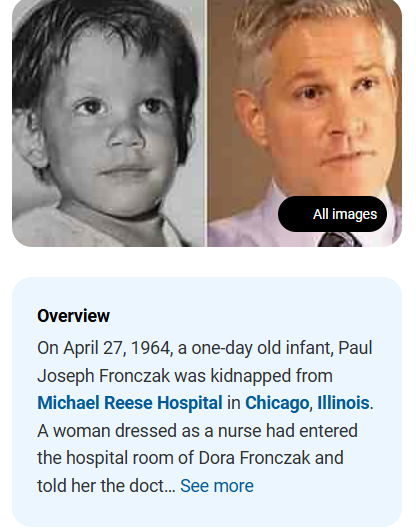

بعض هؤلاء ليسوا ممثلين اصلا !

لنحلل اكثر , دعنا نرى السمات الرئيسية

In [ ]:
missing_actor_rating=missing_actor_rating.drop(columns=['overview','popularity','release_date','budget','status', 'tagline', 'vote_average', 'vote_count','release_day', 'unique_actors_count', 'actors_avg_rating'])

In [ ]:
missing_actor_rating.head(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
2445,923632,The Tinder Swindler,Documentary-Crime,en,RAW-Gaspin Media-AGC Studios,0.0,114.0,Shimon Yehuda Hayut-Cecilie Fjellhøy-Pernilla ...,1,0.0,2022,2
4064,489988,Three Identical Strangers,Documentary,en,Channel 4 Television-RAW,1041955.0,97.0,David Kellman-Robert Shafran-Edward Galland-La...,1,1041955.0,2018,6
4296,789371,Kings Of Astoria,Crime-Drama,en,Davi Productions,0.0,105.0,Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa,0,-5000.0,2022,6
4559,1776,Jesus Camp,Documentary,en,A&E IndieFilms-Loki Films,1013596.0,84.0,Becky Fischer-Mike Papantonio-Ted Haggard-Lou ...,0,1013596.0,2006,9
4691,675776,Persona,Thriller-Romance,en,FILOMINATI,0.0,75.0,Nick Cause-Angelina Mosesova,-1,0.0,2022,10


In [ ]:

documentary_count = missing_actor_rating['genres'].str.contains('Documentary', na=False).sum()

print(f"Number of movies in missing_actor_rating with 'Documentary' genre: {documentary_count}")


Number of movies in missing_actor_rating with 'Documentary' genre: 1385


حسنا , اغليبتهم وئاقيات , دعنا نتخلص منها

In [ ]:
# prompt: drop entries where missing_actor_rating['genres'] contains Documentary

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'genres' column contains the string 'Documentary'
# The '~' inverts the boolean mask. na=False treats NaN values as not containing 'Documentary'.
missing_actor_rating = missing_actor_rating[~missing_actor_rating['genres'].str.contains('Documentary', na=False)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping Documentary: {missing_actor_rating.shape}")
print(f"Number of rows dropped (Documentary genre): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping Documentary (first 5 rows):")

In [ ]:
missing_actor_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 4296 to 41377
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    644 non-null    int64  
 1   title                 644 non-null    object 
 2   genres                644 non-null    object 
 3   original_language     644 non-null    object 
 4   production_companies  644 non-null    object 
 5   revenue               644 non-null    float64
 6   runtime               644 non-null    float64
 7   credits               644 non-null    object 
 8   tagline_sentiment     644 non-null    int64  
 9   profit                644 non-null    float64
 10  release_year          644 non-null    int64  
 11  release_month         644 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.4+ KB


In [ ]:
missing_actor_rating.head(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
4296,789371,Kings Of Astoria,Crime-Drama,en,Davi Productions,0.0,105.0,Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa,0,-5000.0,2022,6
4691,675776,Persona,Thriller-Romance,en,FILOMINATI,0.0,75.0,Nick Cause-Angelina Mosesova,-1,0.0,2022,10
5800,787282,Beyond: The Motion Picture,Science Fiction,en,Innovative Arts-Underdog Pictures-Jackson Motion,0.0,91.0,Lukas Jackson-Marius Johnsson-Sander R. D. Lar...,1,-500.0,2023,11
6221,963804,Cascade,Music-Romance-Drama,en,Ultraviolet Productions,0.0,40.0,James Seed-Paige Hurrell-Kalvin Taylor-Delaney...,0,-400.0,2022,6
6225,950120,Acidic Anna,Horror-Thriller,en,Space Czech Films,0.0,73.0,Thomas Cam-Dasha Diviskova-Dimitrah Vlad-Stell...,-1,-1000.0,2022,6


In [ ]:
missing_actor_rating['profit'].describe()

,profit
count,6.440000e+02
mean,1.522974e+05
std,3.941098e+06
min,-1.000000e+06
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.999900e+07


In [ ]:
(missing_actor_rating['revenue']==0).sum()

np.int64(604)

بعضعهم لم يأتو باي ارادات , و هذا يمكن ان يفسر بانها قيم مفقودة او انها افلام <br>
straight to dvd

In [ ]:
# prompt: drop entires where missing_actor_rating['revenue']==0

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'revenue' column is exactly 0
missing_actor_rating = missing_actor_rating[missing_actor_rating['revenue'] != 0].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with revenue == 0: {missing_actor_rating.shape}")
print(f"Number of rows dropped (revenue == 0): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping revenue == 0 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()

Initial shape of missing_actor_rating: (644, 12)
Shape of missing_actor_rating after dropping rows with revenue == 0: (40, 12)
Number of rows dropped (revenue == 0): 604

missing_actor_rating after dropping revenue == 0 (first 5 rows):
           id                title                 genres original_language  \
6289   949273  TacoTown: The Movie        Thriller-Comedy                en   
19463  711615           Batman Jr.                 Action                en   
21801  896605            Slay Ride  Comedy-Horror-Mystery                en   
28271  672815   ALL COPS AIN'T BAD                 Comedy                en   
29094  748806             Brothers                  Drama                en   

               production_companies   revenue  runtime  \
6289               TacoTales Movies       1.0     50.0   
19463                         TOCCU    1700.0    116.0   
21801  McLean & Cipullo Productions    2000.0     60.0   
28271                  VH2 Networks  350000.0     61.0   

In [ ]:
missing_actor_rating.sample(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
40679,817809,Come Forth Reverend,Action-Thriller,en,Luckee Films,28.0,39.0,Coleton McCants-Gavin Ryan-Gavin Robbins-Culle...,0,26.0,2021,1
21801,896605,Slay Ride,Comedy-Horror-Mystery,en,McLean & Cipullo Productions,2000.0,60.0,Collin McLean-Dominic Cipullo-Trey Gourgeot-No...,1,-3001.0,2022,6
29914,742459,Sosha,Comedy-Romance,en,LIM STUDIO-STONMEDIA,1800.0,50.0,Lebogang Lebang-Themba Nene-Lebo Lebang-Mbalen...,0,0.0,2022,11
39793,709456,Miss Gangster,Drama-Romance,en,CJ HK Entertainment,486842.0,92.0,Nguyễn Minh Tú-Cao Thiên Trang-Hồng Đào-Chế Ng...,1,486842.0,2019,11
40458,895937,Jorja Smith - Live at Glastonbury,Music,en,BBC,100.0,56.0,Jorja Smith,0,0.0,2019,6


In [ ]:
(missing_actor_rating['runtime'] < 60).sum()

np.int64(17)

بعضهم ليسوا افلام اصلاً

In [ ]:
# prompt: drop these (missing_actor_rating['runtime'] < 60)

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'runtime' column is less than 60
missing_actor_rating = missing_actor_rating[~(missing_actor_rating['runtime'] < 60)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with runtime < 60: {missing_actor_rating.shape}")
print(f"Number of rows dropped (runtime < 60): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping runtime < 60 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()


Initial shape of missing_actor_rating: (40, 12)
Shape of missing_actor_rating after dropping rows with runtime < 60: (23, 12)
Number of rows dropped (runtime < 60): 17

missing_actor_rating after dropping runtime < 60 (first 5 rows):
           id                   title                 genres  \
19463  711615              Batman Jr.                 Action   
21801  896605               Slay Ride  Comedy-Horror-Mystery   
28271  672815      ALL COPS AIN'T BAD                 Comedy   
30770  591660  ROW Ladies Night Out 4           Action-Drama   
30960  587961  Queens of Combat QOC 2           Action-Drama   

      original_language          production_companies   revenue  runtime  \
19463                en                         TOCCU    1700.0    116.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
28271                en                  VH2 Networks  350000.0     61.0   
30770                en          Reality Of Wrestling    6555.0    147.0   
3

In [ ]:
missing_actor_rating

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
19463,711615,Batman Jr.,Action,en,TOCCU,1700.0,116.0,Nicholas Onciul-Zachary Onciul-Samantha Onciul,0,-3800.0,2017,4
21801,896605,Slay Ride,Comedy-Horror-Mystery,en,McLean & Cipullo Productions,2000.0,60.0,Collin McLean-Dominic Cipullo-Trey Gourgeot-No...,1,-3001.0,2022,6
28271,672815,ALL COPS AIN'T BAD,Comedy,en,VH2 Networks,350000.0,61.0,Daryll Triplett,0,250000.0,2020,2
30770,591660,ROW Ladies Night Out 4,Action-Drama,en,Reality Of Wrestling,6555.0,147.0,Alex Gracia-Vannarah Riggs-Kiera Hogan-Iveliss...,0,2178.0,2018,11
30960,587961,Queens of Combat QOC 2,Action-Drama,en,Queens Of Combat-HighSpots,5495.0,120.0,Amy Jefferson-Christina Garibaldi-Rachel Barri...,-1,0.0,2014,6
32132,591658,ROW Ladies Night Out 3,Action-Drama,en,Reality Of Wrestling,9885.0,122.0,Ivelisse Vélez-Kiera Hogan-Shojo Machiko-Calle...,0,1997.0,2018,8
32210,587980,Queens Of Combat QOC 12,Action-Drama,en,Queens Of Combat,13230.0,78.0,Dominique Fabiano-Taeler Conrad-Mellen-Tessa B...,-1,0.0,2016,5
33430,588002,Queens Of Combat QOC 22,Action-Drama,en,Queens Of Combat,8999.0,90.0,Kiera Hogan-Olivia Hasler-Madi Maxx-Renee Mich...,-1,2277.0,2018,3
33765,591659,ROW Ladies Night Out II,Action-Drama,en,Reality Of Wrestling,8900.0,123.0,Callee Wilkerson-Patricia Parker-Ivelisse Véle...,0,4956.0,2018,5
34181,588007,Queens Of Combat QOC 25,Action-Drama,en,Queens Of Combat,11221.0,88.0,Xia Henderson-Olivia Hasler-Priscilla Zuniga-V...,-1,1231.0,2018,5


هنا نرى افلام وئاقية و لكنها لم تصنف انها وثائقية , و نرى بعض عروض المصارعة

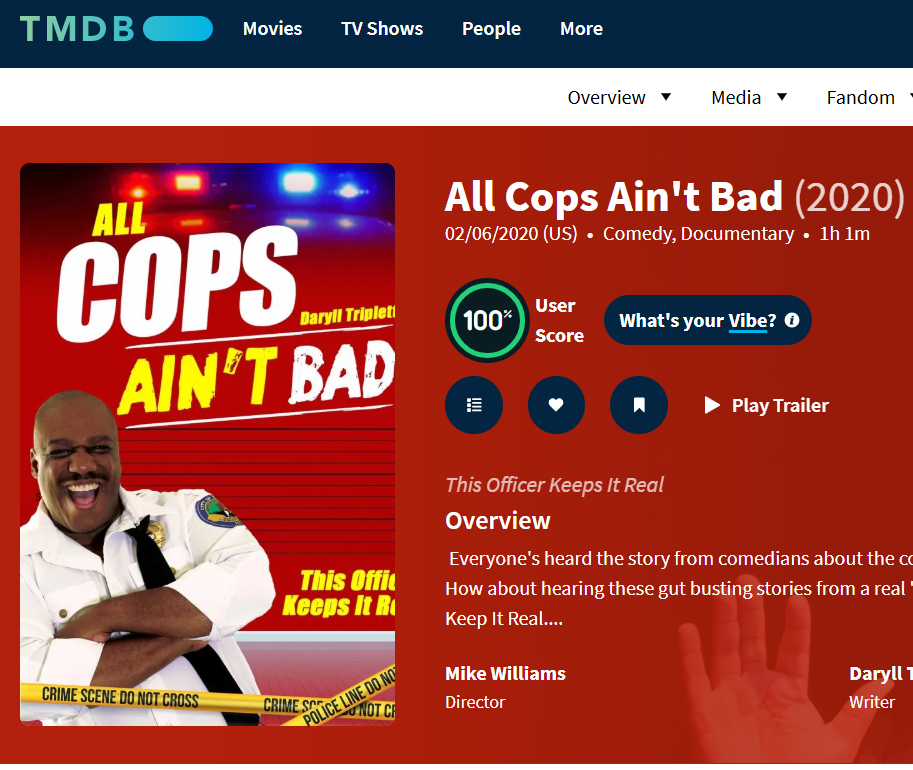

## الاوسكار 
---
features that will add more favouritism to movies/actors  
ميزات ستضيف تميز اكثر للممثلين والافلام 


---
#### سمة الاوسكار للافلام 
---

In [ ]:

#  Normalize titles for matching
def normalize_title(title):
    if pd.isna(title):
        return ""
    title = title.lower()
    title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
    return title

oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)
leen_movies_df['normalized_title'] = leen_movies_df['title'].apply(normalize_title)

# ✨ Find intersection
matched_movies = leen_movies_df['normalized_title'].isin(oscars_df['normalized_film'])
num_matched_movies = matched_movies.sum()

print(f"matched movies :  {num_matched_movies}")


matched movies :  3097


In [ ]:
# ✨ Create map from normalized title to highest oscar status
# 0: not nominated, 1: nominated, 2: winner

# First compute status per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Get highest status per film
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Map status to leen_movies_df
def get_movie_oscar_status(normalized_title, oscar_map):
    return oscar_map.get(normalized_title, 0)

leen_movies_df['movie_oscar'] = leen_movies_df['normalized_title'].apply(
    lambda x: get_movie_oscar_status(x, oscar_movie_status)
)

print("\n--- movie_oscar ---")
print(leen_movies_df[['title', 'movie_oscar']].head(10))



--- movie_oscar ---
                                 title  movie_oscar
0                    Meg 2: The Trench            0
1                  The Pope's Exorcist            0
2                 Deadpool & Wolverine            0
3     Transformers: Rise of the Beasts            0
4                       Dune: Part Two            2
5                Venom: The Last Dance            0
6    Ant-Man and the Wasp: Quantumania            0
7                            Creed III            0
8              Insidious: The Red Door            0
9  Spider-Man: Across the Spider-Verse            1


In [ ]:
leen_movies_df['movie_oscar'].value_counts()

,count
movie_oscar,
0,38302
1,2109
2,988


### سمة اوسكار لكادر الفلم 

In [ ]:

# 🟣 لديك بالفعل هذا الـ normalize_and_split_credits:
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# 🟣 Normalize names في oscars_df
oscars_df['normalized_name'] = oscars_df['name'].apply(lambda x: re.sub(r'[^a-z0-9]', '', x.lower()) if pd.notna(x) else "")

# 🟣 حساب حالة الأوسكار لكل شخص
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# 🟣 عمل خريطة: الاسم → أعلى حالة أوسكار
oscar_person_status = oscars_df.groupby('normalized_name')['winner_numeric'].max().to_dict()

# 🟣 دالة لتحديد حالة الأوسكار لأسماء الفيلم كلها
def get_movie_credits_oscar_status(credits_list, oscar_map):
    found_statuses = [
        oscar_map[name]
        for name in credits_list
        if name in oscar_map
    ]
    if not found_statuses:
        return 0
    else:
        return max(found_statuses)  # إذا هناك أكثر من شخص، خذ أعلى حالة (2 > 1 > 0)

# 🟣 طبق على الأفلام
leen_movies_df['movie_credits_oscar'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_movie_credits_oscar_status(x, oscar_person_status)
)

# 🟣 عرض عينة
print("\n---  movie_credits_oscar ---")
print(leen_movies_df[['title', 'movie_credits_oscar']].head(10))



---  movie_credits_oscar ---
                                 title  movie_credits_oscar
0                    Meg 2: The Trench                    0
1                  The Pope's Exorcist                    2
2                 Deadpool & Wolverine                    2
3     Transformers: Rise of the Beasts                    2
4                       Dune: Part Two                    2
5                Venom: The Last Dance                    1
6    Ant-Man and the Wasp: Quantumania                    2
7                            Creed III                    0
8              Insidious: The Red Door                    1
9  Spider-Man: Across the Spider-Verse                    2


In [ ]:
leen_movies_df['movie_credits_oscar'].value_counts()

,count
movie_credits_oscar,
0,25255
2,9838
1,6306


In [ ]:
leen_movies_df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,release_month,release_day,unique_actors_count,actors_avg_rating,actors_bayesian_rating,actors_penalty_rating,normalized_title,movie_oscar,normalized_credits_list,movie_credits_oscar
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,8,2,27,5.48,5.74,3.27,meg2thetrench,0,"[jasonstatham, wujing, shuyasophiacai, sergiop...",0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,4,5,30,5.74,5.83,2.97,thepopesexorcist,0,"[russellcrowe, danielzovatto, alexessoe, franc...",2
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,7,24,57,6.08,6.03,3.46,deadpoolwolverine,0,"[ryanreynolds, hughjackman, emmacorrin, matthe...",2
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,6,6,38,6.05,5.93,3.30,transformersriseofthebeasts,0,"[anthonyramos, dominiquefishback, lunalaurenve...",2
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,2,27,105,5.88,5.90,2.67,duneparttwo,2,"[timothéechalamet, zendaya, rebeccaferguson, j...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41394,616368,The Cavalier,Adventure-Action-Drama,en,In old Mexico a masked rider (Talmadge) and an...,0.448,Tiffany-Stahl Productions,1928-11-01,0.0,0.000000e+00,...,11,1,8,6.04,6.00,1.75,thecavalier,0,"[richardtalmadge, barbarabedford, noracecil, d...",0
41395,397861,Paradise Lost: Over the Madness,Documentary-Music,en,In a career that has spanned 20 years (and cou...,0.442,Kayane Productions,2007-05-28,50.0,0.000000e+00,...,5,28,15,4.13,5.21,1.03,paradiselostoverthemadness,0,"[nickholmes, gregmackintosh, aaronaedy, stevee...",0
41396,728369,Campeones: 1978 FIFA World Cup official film,Documentary,en,The FIFA official film of the 1978 World Cup h...,0.255,FIFA Films,1978-01-01,0.0,0.000000e+00,...,1,1,1,5.43,5.70,1.36,campeones1978fifaworldcupofficialfilm,0,[stevehudson],0
41397,947763,Endurance,Documentary,en,A century after Shackleton's Endurance sank be...,0.001,Little Dot Studios-Little Monster Films-Histor...,2024-10-14,0.0,0.000000e+00,...,10,14,13,5.90,5.87,5.90,endurance,0,"[mensunbound, johnshears, nicolasvincent, dans...",0


### سمة الاوسكار للشركات المنتجة

In [ ]:

# Step 1: Normalize movie titles in oscars_df (already done if you ran before)
if 'normalized_film' not in oscars_df.columns:
    def normalize_title(title):
        if pd.isna(title):
            return ""
        title = title.lower()
        title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
        return title
    oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)

# Step 2: Calculate the Oscar status (1 for nominated, 2 for winner) per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Step 3: Get highest oscar status per movie
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Step 4: Normalize production companies in leen_movies_df
# production_companies may be a string like 'Company A, Company B', so split and normalize each company
def normalize_company_list(companies_string):
    if pd.isna(companies_string):
        return []
    # split by comma and clean spaces
    companies = [comp.strip().lower() for comp in companies_string.split(',')]
    # remove non-alphanumeric characters for consistency
    companies = [re.sub(r'[^a-z0-9]', '', c) for c in companies if c]
    return companies

leen_movies_df['normalized_companies_list'] = leen_movies_df['production_companies'].apply(normalize_company_list)

# Step 5: Map each movie to its Oscar status (0 if no nomination)
leen_movies_df['movie_oscar_status'] = leen_movies_df['normalized_title'].map(oscar_movie_status).fillna(0).astype(int)

# Step 6: Aggregate Oscar wins/nominations count per company across movies
from collections import defaultdict

company_oscars_count = defaultdict(int)

for idx, row in leen_movies_df.iterrows():
    companies = row['normalized_companies_list']
    movie_oscar = row['movie_oscar_status']
    for company in companies:
        company_oscars_count[company] += movie_oscar

# Step 7: Create a company -> oscar count lookup dict
# (already in company_oscars_count)

# Step 8: Define a function to get total oscar count for a movie's companies
def get_company_oscars(companies_list, oscar_count_map):
    total = 0
    for company in companies_list:
        total += oscar_count_map.get(company, 0)
    return total

# Step 9: Apply function to create feature
leen_movies_df['company_oscars'] = leen_movies_df['normalized_companies_list'].apply(
    lambda comps: get_company_oscars(comps, company_oscars_count)
)

# Step 10: Clean up temp columns if desired
leen_movies_df.drop(columns=['normalized_companies_list', 'movie_oscar_status'], inplace=True)

# Show sample
print("\n--- Sample of new feature company_oscars ---")
print(leen_movies_df[['title', 'production_companies', 'company_oscars']].head(10))



--- Sample of new feature company_oscars ---
                                 title  \
0                    Meg 2: The Trench   
1                  The Pope's Exorcist   
2                 Deadpool & Wolverine   
3     Transformers: Rise of the Beasts   
4                       Dune: Part Two   
5                Venom: The Last Dance   
6    Ant-Man and the Wasp: Quantumania   
7                            Creed III   
8              Insidious: The Red Door   
9  Spider-Man: Across the Spider-Verse   

                                production_companies  company_oscars  
0  Apelles Entertainment-Warner Bros. Pictures-di...               0  
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...               0  
2  Marvel Studios-Maximum Effort-21 Laps Entertai...               0  
3  Skydance-Paramount-di Bonaventura Pictures-Bay...               0  
4                                 Legendary Pictures               4  
5  Columbia Pictures-Pascal Pictures-Matt Tolmach...             

In [ ]:
leen_movies_df['company_oscars'].value_counts()

,count
company_oscars,
0,30628
1,2207
2,1118
104,896
254,865
182,797
72,682
149,645
177,614


## بيانات الممثلين النجوم 

In [ ]:
df1.drop(columns=['Unnamed: 0', 'adult','gender','id'], inplace=True)
print(df1.head())


             name   original_name  popularity known_for_department
0     Gary Oldman     Gary Oldman     212.888               Acting
1   Ryan Reynolds   Ryan Reynolds     199.717               Acting
2  Sydney Sweeney  Sydney Sweeney     193.376               Acting
3   Jason Statham   Jason Statham     187.787               Acting
4   Chloe Coleman   Chloe Coleman     175.645               Acting


In [ ]:
df1 = df1[df1['known_for_department'] == 'Acting'].reset_index(drop=True)


In [ ]:
df1.shape

(9437, 4)

In [ ]:
duplicate_names = df1['name'][df1['name'].duplicated(keep=False)]
df_duplicates = df1[df1['name'].isin(duplicate_names)]

name_mismatches = df1[df1['name'] != df1['original_name']]
df1 = df1.drop_duplicates().reset_index(drop=True)


In [ ]:
print(df1.isna().sum())


name                    0
original_name           0
popularity              0
known_for_department    0
dtype: int64


In [ ]:
diff_names = df1[df1['name'] != df1['original_name']]
print(diff_names[['name', 'original_name']].head())
print(f"Total differing entries: {len(diff_names)}")


           name original_name
5      Yoo Jung            유정
20    Zhao Lusi           赵露思
32           수지    Kim Soo-ji
36  Min Do-yoon           민도윤
55    Gal Gadot       גל גדות
Total differing entries: 2000


In [ ]:
df1 = df1[df1['original_name'].apply(lambda x: isinstance(x, str) and x.isascii())].reset_index(drop=True)


In [ ]:
english_name_pattern = re.compile(r'^[A-Za-z .\'\-]+$')
df1 = df1[
    df1['name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x))) &
    df1['original_name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x)))
].reset_index(drop=True)


In [ ]:
df1 = df1[df1['name'] == df1['original_name']].reset_index(drop=True)


In [ ]:
df1.shape

(5946, 4)

In [ ]:
print("Max popularity:", df1['popularity'].max())
print("Min popularity:", df1['popularity'].min())


Max popularity: 212.888
Min popularity: 14.064


In [ ]:
top_200 = df1.sort_values(by='popularity', ascending=False).head(150)
print(top_200[['name',  'popularity']])

                  name  popularity
0          Gary Oldman     212.888
1        Ryan Reynolds     199.717
2       Sydney Sweeney     193.376
3        Jason Statham     187.787
4        Chloe Coleman     175.645
..                 ...         ...
145  Samuel L. Jackson      73.183
146         Karl Urban      72.848
147       Blake Lively      72.748
148        Emma Watson      72.617
149     Robert De Niro      72.451

[150 rows x 2 columns]


In [ ]:
popular_celebs = df1[df1['popularity'] > 90].sort_values(by='popularity', ascending=False)
display(popular_celebs[['name', 'original_name', 'popularity']])


,name,original_name,popularity
0,Gary Oldman,Gary Oldman,212.888
1,Ryan Reynolds,Ryan Reynolds,199.717
2,Sydney Sweeney,Sydney Sweeney,193.376
3,Jason Statham,Jason Statham,187.787
4,Chloe Coleman,Chloe Coleman,175.645
...,...,...,...
59,Dakota Johnson,Dakota Johnson,91.852
60,Ben Affleck,Ben Affleck,91.551
61,Anne Hathaway,Anne Hathaway,91.416
62,Mickey Rourke,Mickey Rourke,91.297


In [ ]:
print(df3.info())
print(df3.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1647 non-null   object 
 1   Pay (USD millions)  1647 non-null   float64
 2   Year                1647 non-null   int64  
 3   Category            1647 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 51.6+ KB
None
               Name  Pay (USD millions)  Year             Category
0     Oprah Winfrey               225.0  2005        Personalities
1       Tiger Woods                87.0  2005             Athletes
2        Mel Gibson               185.0  2005               Actors
3      George Lucas               290.0  2005  Directors/Producers
4  Shaquille O'Neal                33.4  2005             Athletes


In [ ]:
df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])].reset_index(drop=True)


In [ ]:
print(df3_filtered['Category'].value_counts())
print(df3_filtered)


Category
Actors       176
Actresses    107
Name: count, dtype: int64
                   Name  Pay (USD millions)  Year   Category
0            Mel Gibson               185.0  2005     Actors
1           Johnny Depp                37.0  2005     Actors
2            Tom Cruise                31.0  2005     Actors
3             Brad Pitt                25.0  2005     Actors
4            Will Smith                35.0  2005     Actors
..                  ...                 ...   ...        ...
278  Lin-Manuel Miranda                45.5  2020     Actors
279          Will Smith                44.5  2020     Actors
280        Adam Sandler                41.0  2020     Actors
281         Jackie Chan                40.0  2020     Actors
282      Angelina Jolie                35.5  2020  Actresses

[283 rows x 4 columns]


In [ ]:
duplicated_names = df3_filtered[df3_filtered.duplicated(subset='Name', keep=False)]
name_counts = duplicated_names['Name'].value_counts()
print("Duplicated Names and Their Counts:")
print(name_counts)


Duplicated Names and Their Counts:
Name
Adam Sandler          14
Tom Cruise            13
Will Smith            11
Angelina Jolie        10
Jennifer Aniston      10
Robert Downey Jr.      9
Johnny Depp            9
Dwayne Johnson         9
Brad Pitt              9
Sandra Bullock         8
Cameron Diaz           8
Leonardo DiCaprio      8
Jackie Chan            7
Reese Witherspoon      7
Mark Wahlberg          6
Tom Hanks              6
Scarlett Johansson     6
Akshay Kumar           6
Vin Diesel             5
Meryl Streep           5
Ben Stiller            5
Julia Roberts          5
Ben Affleck            5
Nicole Kidman          5
Kristen Stewart        4
Matt Damon             4
George Clooney         4
Jennifer Lawrence      4
Alec Baldwin           4
Daniel Radcliffe       4
Drew Barrymore         3
Gwyneth Paltrow        3
Ashton Kutcher         3
Bradley Cooper         3
Zooey Deschanel        3
Melissa McCarthy       3
Salman Khan            3
Shah Rukh Khan         2
Nicolas Ca

In [ ]:
df3_latest = df3_filtered.sort_values('Year', ascending=False).drop_duplicates(subset='Name', keep='first').reset_index(drop=True)
df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)

               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [ ]:
df3_latest = df3_filtered.sort_values('Year', ascending=False) \
                         .drop_duplicates(subset='Name', keep='first') \
                         .reset_index(drop=True)

df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)


               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [ ]:
names1 = df1['name'].dropna().str.lower().str.strip().drop_duplicates()
names3 = df3['Name'].dropna().str.lower().str.strip().drop_duplicates()


In [ ]:
matched_names = set(names1) &set(names3)
print(f"Matched names: {len(matched_names)}")


Matched names: 142


In [ ]:
df1 = df1[df1['name'].str.lower().str.strip().isin(matched_names)]
df3 = df3[df3['Name'].str.lower().str.strip().isin(matched_names)]


In [ ]:
print(df1[['name', 'popularity']].sort_values(by='popularity', ascending=False))


                     name  popularity
1           Ryan Reynolds     199.717
5      Scarlett Johansson     152.879
9            Hugh Jackman     144.698
17         Channing Tatum     125.579
19            Johnny Depp     122.255
...                   ...         ...
5456        Oprah Winfrey      22.706
5513  Neil Patrick Harris      22.602
5762         Bette Midler      22.184
5779           Tim McGraw      22.174
5787        Jimmy Buffett      22.163

[142 rows x 2 columns]


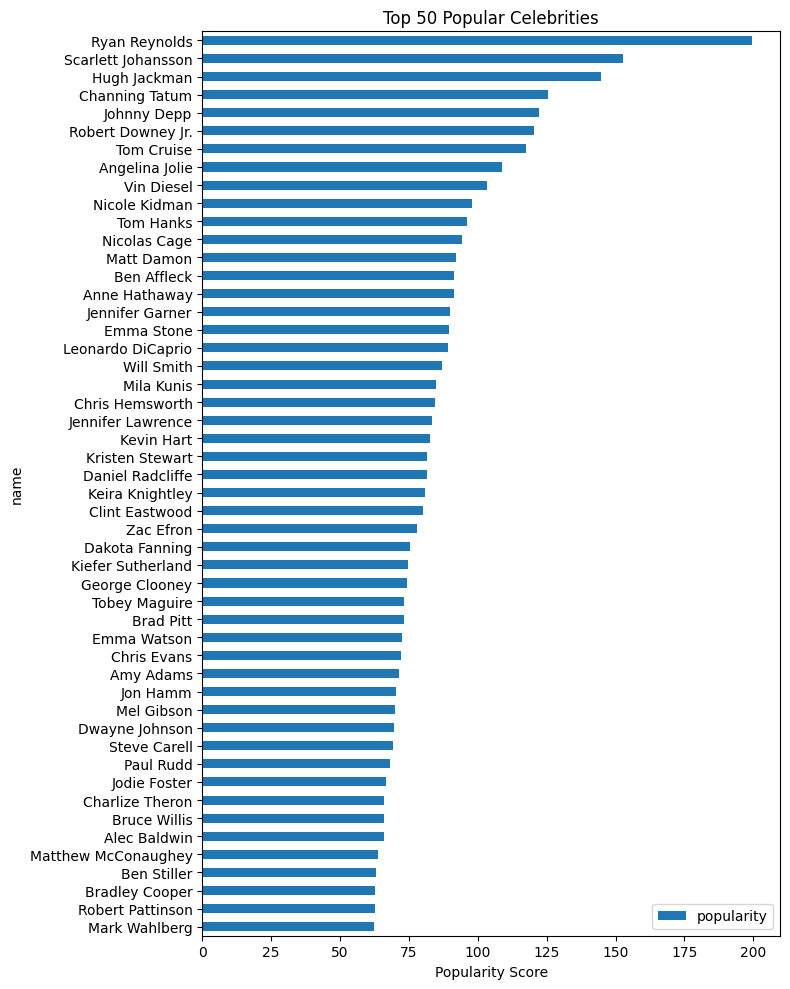

In [ ]:
df1.sort_values(by='popularity', ascending=False).head(50).plot(
    x='name', y='popularity', kind='barh', figsize=(8, 10), title='Top 50 Popular Celebrities'
)
plt.gca().invert_yaxis() 
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()


In [ ]:
df1['name_clean'] = df1['name'].str.lower().str.strip()
df3['name_clean'] = df3['Name'].str.lower().str.strip()

df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])]
merged_df = df1.merge(
    df3_filtered[['name_clean', 'Pay (USD millions)', 'Year', 'Category']],
    on='name_clean',
    how='inner'
)
merged_df = (
    merged_df.sort_values('Year', ascending=False)
             .drop_duplicates(subset='name', keep='first')
             .sort_values(by='Pay (USD millions)', ascending=False)
             .reset_index(drop=True)
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'Category']])


,name,popularity,Pay (USD millions),Category
0,George Clooney,74.270,239.0,Actors
1,Mel Gibson,70.105,185.0,Actors
2,Dwayne Johnson,69.724,87.5,Actors
3,Chris Hemsworth,84.653,76.4,Actors
4,Ryan Reynolds,199.717,71.5,Actors
5,Robert Downey Jr.,120.346,66.0,Actors
6,Harrison Ford,55.550,65.0,Actors
7,Mark Wahlberg,62.425,58.0,Actors
8,Bradley Cooper,62.768,57.0,Actors
9,Scarlett Johansson,152.879,56.0,Actresses


In [ ]:
df3.shape

(524, 5)

In [ ]:
merged_df['is_superstar'] = True


In [ ]:
display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'is_superstar']])


,name,popularity,Pay (USD millions),is_superstar
0,George Clooney,74.270,239.0,True
1,Mel Gibson,70.105,185.0,True
2,Dwayne Johnson,69.724,87.5,True
3,Chris Hemsworth,84.653,76.4,True
4,Ryan Reynolds,199.717,71.5,True
5,Robert Downey Jr.,120.346,66.0,True
6,Harrison Ford,55.550,65.0,True
7,Mark Wahlberg,62.425,58.0,True
8,Bradley Cooper,62.768,57.0,True
9,Scarlett Johansson,152.879,56.0,True


In [ ]:
merged_df.shape

(73, 9)

In [ ]:
merged_df.columns

Index(['name', 'original_name', 'popularity', 'known_for_department',
       'name_clean', 'Pay (USD millions)', 'Year', 'Category', 'is_superstar'],
      dtype='object')

In [ ]:
merged_df[['name', 'popularity', 'Pay (USD millions)', 'is_superstar']].to_csv('superstars_actors.csv', index=False)
